In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels .api as sm
%matplotlib inline

([array([  13.,   43.,   99.,  188.,  282.,  209.,  105.,   48.,   10.,    3.]),
  array([   7.,   26.,   81.,  188.,  241.,  234.,  141.,   59.,   18.,    5.])],
 array([-0.04287723, -0.02849235, -0.01410747,  0.00027741,  0.01466229,
         0.02904717,  0.04343206,  0.05781694,  0.07220182,  0.0865867 ,
         0.10097158]),
 <a list of 2 Lists of Patches objects>)

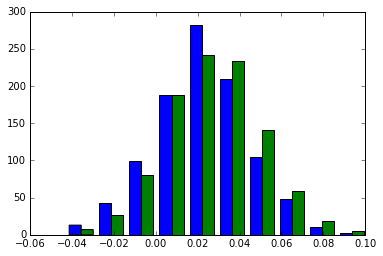

In [2]:
r0 = [0.01, 0.015]
mu = 0.0025
T = 5
vol = 0.01
var = vol*vol
rho = 0.0
means = [r+mu*T for r in r0]

c = [[var*T, var*rho*T],[var*rho*T,var*T]]
n = 1000
n2 = np.random.multivariate_normal(means, c, n)
plt.hist(n2)

In [3]:
z = [np.exp(-x) for x in n2[:,0]]
zp = np.mean(z)
cc = np.cov(z, n2[:,1])[0][1]
print ('ED convexity adjustment in bps: ', (cc/zp)*100000)

('ED convexity adjustment in bps: ', 2.6694444935749964)


              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                        
2007-01-02  4.79  5.07  5.11  5.00  4.80  4.71  4.68  4.68  4.68  4.87  4.79
2007-01-03  4.84  5.05  5.09  4.98  4.76  4.69  4.66  4.66  4.67  4.85  4.77
2007-01-04  4.80  5.04  5.07  4.95  4.71  4.63  4.61  4.61  4.62  4.81  4.72
2007-01-05  4.81  5.05  5.09  4.98  4.76  4.68  4.65  4.65  4.65  4.84  4.74
2007-01-08  4.87  5.08  5.13  5.01  4.78  4.70  4.66  4.66  4.66  4.84  4.74


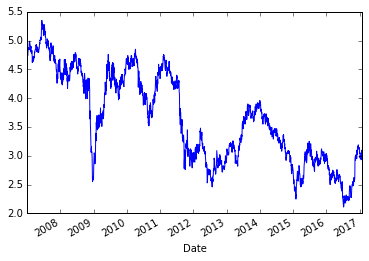

In [4]:
#di = 'E:\Term2\6971FXincomeTra\Week 4'
#fl = 'CMT-all.xlsx'
#xl = pd.ExcelFile(di+fl)
#df = xl.parse('Sheet1')
df = pd.read_excel('CMT-all.xlsx')
df = df.set_index('Date')
dl = '2006-12-31'
df = df[df.index > dl]
df=df.dropna()
print (df.head())
df['30Y'].plot()

In [5]:
def alpha(t,l):
    return ((1-np.exp(-l*t))/(l*t))

lam = 0.0609
term = [1, 3, 6, 12, 24, 36, 60, 84, 120, 240, 360]
b2 = [alpha(t,lam) for t in term]
b3 = [alpha(t,lam)-np.exp(-lam*t) for t in term]

#create the array to store betas
beta_1 = []
beta_2 = []
beta_3 = []

#define the independent variables
x = np.array([b2+b3]).reshape(2,-1).T
x = sm.add_constant(x)

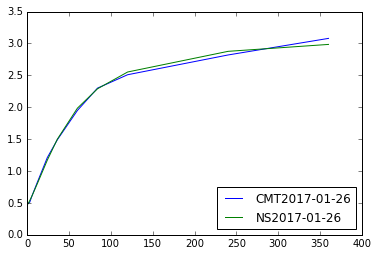

                             OLS Regression Results                            
Dep. Variable:     2017-01-26 00:00:00   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     2025.
Date:                 Tue, 25 Apr 2017   Prob (F-statistic):           1.51e-11
Time:                         10:39:45   Log-Likelihood:                 19.592
No. Observations:                   11   AIC:                            -33.18
Df Residuals:                        8   BIC:                            -31.99
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2025      0.036     88.92

C:\Users\Andy\AppData\Local\Enthought\Canopy\User\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [6]:
#fit regression model --- example for 2017-01-26
dt = '2017-01-26'
yt = df.loc[dt]
results = sm.OLS(yt,x).fit()
plots = [plt.plot(term, yt, label = 'CMT' + dt), plt.plot(term, results.fittedvalues, label = 'NS' + dt)]
plt.legend(loc = 'lower right')
plt.show()
# Inspect the resultsp
#print (dir(results))
print (results.summary())

In [7]:
##Step 1: fit beat1(t); beta2(t); beta3(t) to a set of yields observed on day t(repeat for all days in the dataset)
for t in df.index:
    y = df.loc[t]
    result = sm.OLS(y,x).fit()
    beta_1.append(result.params[0])
    beta_2.append(result.params[1])
    beta_3.append(result.params[2])

mean_beta1 = np.mean(np.nan_to_num(np.array(beta_1)))
mean_beta2 = np.mean(np.nan_to_num(np.array(beta_2)))
mean_beta3 = np.mean(np.nan_to_num(np.array(beta_3)))
std_beta1 = np.std(np.nan_to_num(np.array(beta_1)))
std_beta2 = np.std(np.nan_to_num(np.array(beta_2)))
std_beta3 = np.std(np.nan_to_num(np.array(beta_3)))

In [8]:
print ('beta_1 estimation: \n')
print ('       mean of beta1:                ', mean_beta1)
print ('       standard deviation of beta1:  ', std_beta1)
print ('       maximum of beta1:             ', max(beta_1))
print ('       minimum of beta1:             ', min(beta_1))
print '\n'

print ('beta_2 estimation: \n')
print ('       mean of beta2:                ', mean_beta2)
print ('       standard deviation of beta2:  ', std_beta2)
print ('       maximum of beta2:             ', max(beta_2))
print ('       minimum of beta2:             ', min(beta_2))
print '\n'

print ('beta_3 estimation: \n')
print ('       mean of beta3:                ', mean_beta3)
print ('       standard deviation of beta3:  ', std_beta3)
print ('       maximum of beta3:             ', max(beta_3))
print ('       minimum of beta3:             ', min(beta_3))
print '\n'

beta_1 estimation: 

('       mean of beta1:                ', 3.8700235027856782)
('       standard deviation of beta1:  ', 0.88836870313268079)
('       maximum of beta1:             ', 5.3725871759852417)
('       minimum of beta1:             ', 2.0148400659801529)


beta_2 estimation: 

('       mean of beta2:                ', -3.0901438148280183)
('       standard deviation of beta2:  ', 1.2613221918560111)
('       maximum of beta2:             ', 0.69120248134932227)
('       minimum of beta2:             ', -5.2776725977154726)


beta_3 estimation: 

('       mean of beta3:                ', -4.1186786125068018)
('       standard deviation of beta3:  ', 1.7784482349560171)
('       maximum of beta3:             ', 0.99434846657073028)
('       minimum of beta3:             ', -7.5458503651760216)




In [14]:
##Step 2: Find lamda that bests ts the whole dataset
lamda = np.linspace(0.1,0.5,50)
sss = []
for la in lamda:
    lam = la
    b2 = [alpha(t,lam) for t in term]
    b3 = [alpha(t,lam)-np.exp(-lam*t) for t in term]

    #define the independent variables
    x = np.array([b2+b3]).reshape(2,-1).T
    x = sm.add_constant(x)
    sss_t = []
    for t in df.index:
        y = df.loc[t]
        result = sm.OLS(y,x).fit()
        #y = np.nan_to_num(np.array(y))
        #result.fittedvalues = np.nan_to_num(np.array(result.fittedvalues))
        #s = 0
        #for i in range(y.shape[0]):
            #s = s + (y[i]-result.fittedvalues[i])**2
        sss_t.append((result.params[0]+result.params[1]*b2+result.params[3]*b3-y)**2)    
        
    ss = np.mean(np.nan_to_num(np.array(sss_t)))
    sss.append(ss)

C:\Users\Andy\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: index out of bounds

In [22]:
#indice = np.argsort(sss)
#lamda[indice[0]]
result.params[0]

4.7006575198172076

In [246]:
print np.mean(np.nan_to_num(df_new[:,0]))
print np.mean(np.nan_to_num(df_new[:,1]))
print np.mean(np.nan_to_num(df_new[:,2]))


4.88385963992
4.79877912349
-0.765825109536


eigenvalue：

[  1.30765352e+01   1.33117498e+00   1.60278865e-01   2.99490288e-02
   7.10715053e-03   6.19484771e-03   1.66736550e-03   7.65471871e-04
   6.48167504e-04   4.29217411e-04   1.49003286e-04]


PCA: 1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y

[[ 0.36221159 -0.2635264  -0.3553258   0.571693    0.21671252 -0.31994365
   0.3850333  -0.02639289  0.06822511  0.00695696 -0.20805946]
 [ 0.36796307 -0.25544744 -0.27197422  0.18175768 -0.09131553  0.10527187
  -0.56601838  0.0055126  -0.20977489 -0.06138864  0.55203441]
 [ 0.37468231 -0.24497625 -0.1492672  -0.25847592 -0.39077389  0.23208106
  -0.24242498 -0.04313546  0.18551342 -0.01139907 -0.63934947]
 [ 0.3633727  -0.21166781  0.00237354 -0.4551498  -0.15319274  0.07984223
   0.55254454  0.20906821  0.11628666  0.24256249  0.40592255]
 [ 0.33355976 -0.10206999  0.27108608 -0.30833661  0.42244605 -0.04679642
   0.06658196 -0.09623099 -0.41903258 -0.57259664 -0.10936697]
 [ 0.31415106  0.00766329  0.4327323  -0

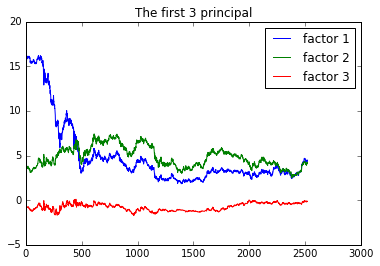

In [244]:
#Construct PCAs from the levels of yields.
C = df.cov()
evals, evecs = np.linalg.eig(C)
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
for i in range(evecs.shape[1]):
    evecs[:,i] / np.linalg.norm(evecs[:,i]) * np.sqrt(evals[i])

print ('eigenvalue：\n')
print evals
print '\n'
print ('PCA: 1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y\n')
print evecs

# produce new data matrix
df_new = np.dot(df, evecs)
plt.plot(df_new[:,0], label = 'factor 1')
plt.plot(df_new[:,1], label = 'factor 2')
plt.plot(df_new[:,2], label = 'factor 3')
plt.legend(loc = 'upper right')
plt.title('The first 3 principal')